In [1]:
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
import requests
import io
import pandas as pd

# URL of the CSV file
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch the data from the URL
response = requests.get(URL)

# Raise an error if the request failed
response.raise_for_status()

# Convert the response content into a readable format for pandas
csv_content = io.StringIO(response.text)

# Read the CSV data into a pandas dataframe
df = pd.read_csv(csv_content)

# Print confirmation
print('Data downloaded and read into a dataframe!')

# Optional: Show the first few rows of the dataframe
print(df.head())


Data downloaded and read into a dataframe!
        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Aut

In [6]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [7]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

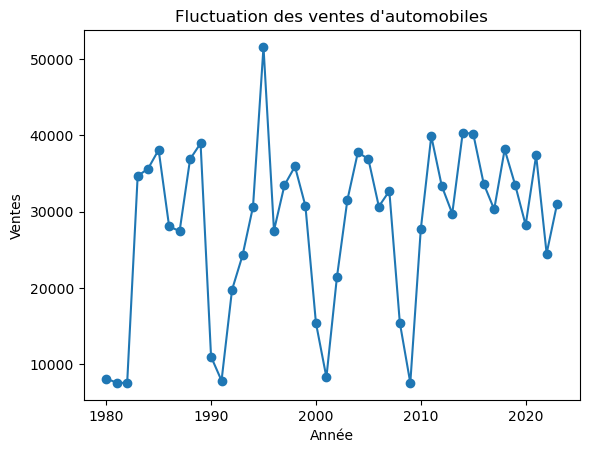

In [4]:
# TÂCHE 1.1 : Graphique en ligne des ventes d'automobiles par année
df.groupby('Year')['Automobile_Sales'].sum().plot(kind='line', marker='o')
plt.title("Fluctuation des ventes d'automobiles")
plt.xlabel("Année")
plt.ylabel("Ventes")
plt.show()

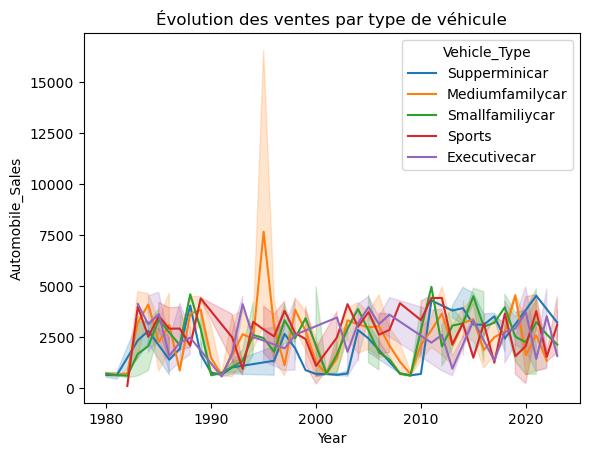

In [5]:
# TÂCHE 1.2 : Tracer différentes lignes par type de véhicule et analyse des tendances
sns.lineplot(data=df, x='Year', y='Automobile_Sales', hue='Vehicle_Type')
plt.title("Évolution des ventes par type de véhicule")
plt.show()

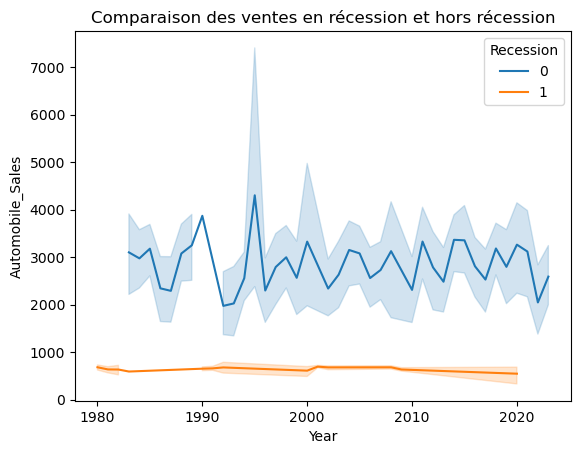

In [6]:
# TÂCHE 1.3 : Comparaison des tendances de ventes en période de récession et hors récession
sns.lineplot(data=df, x='Year', y='Automobile_Sales', hue='Recession')
plt.title("Comparaison des ventes en récession et hors récession")
plt.show()

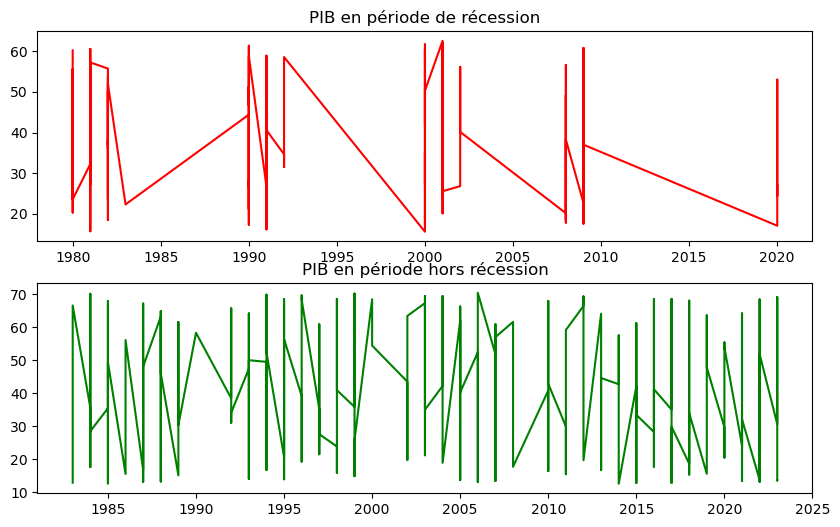

In [7]:
# TÂCHE 1.4 : Comparaison des variations du PIB
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
recession = df[df['Recession'] == 1]
non_recession = df[df['Recession'] == 0]
ax[0].plot(recession['Year'], recession['GDP'], label='Récession', color='red')
ax[1].plot(non_recession['Year'], non_recession['GDP'], label='Hors Récession', color='green')
ax[0].set_title("PIB en période de récession")
ax[1].set_title("PIB en période hors récession")
plt.show()

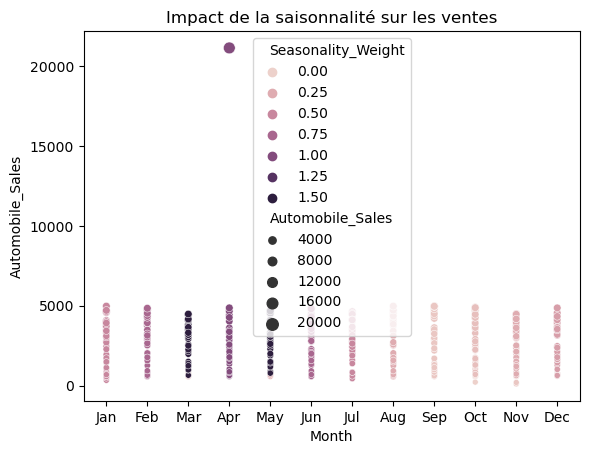

In [8]:
# TÂCHE 1.5 : Diagramme à bulles pour l'impact de la saisonnalité
sns.scatterplot(data=df, x='Month', y='Automobile_Sales', size='Automobile_Sales', hue='Seasonality_Weight')
plt.title("Impact de la saisonnalité sur les ventes")
plt.show()

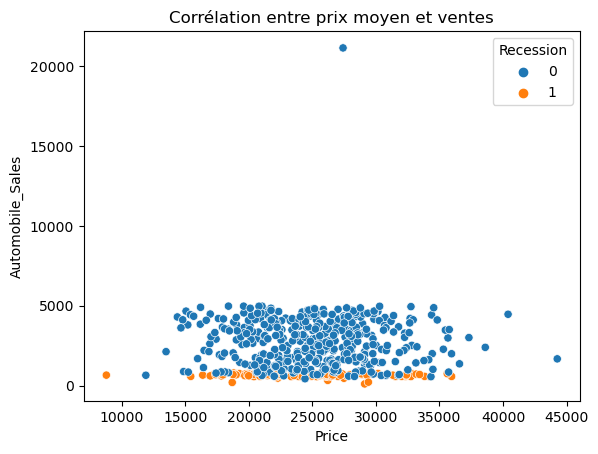

In [9]:
# TÂCHE 1.6 : Diagramme de dispersion entre prix moyen et volume des ventes
sns.scatterplot(data=df, x='Price', y='Automobile_Sales', hue='Recession')
plt.title("Corrélation entre prix moyen et ventes")
plt.show()


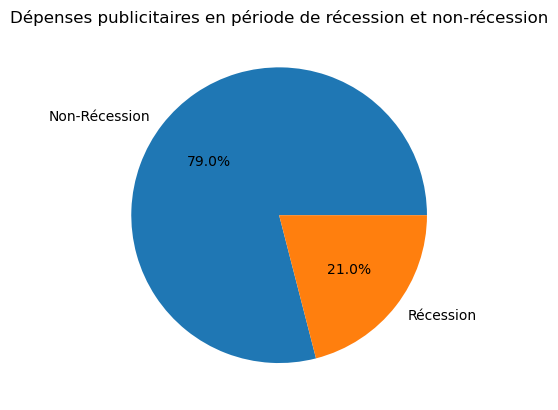

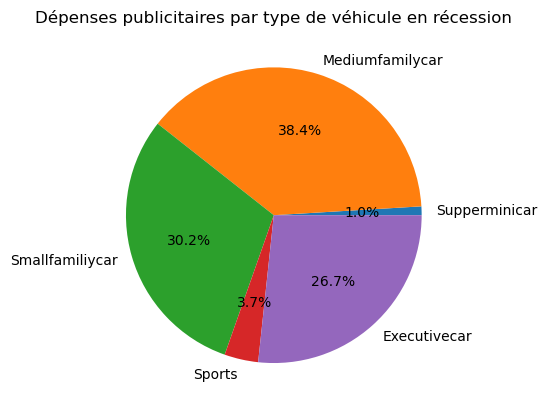

In [10]:
# TÂCHE 1.7 et 1.8 : Diagramme circulaire des dépenses publicitaires
plt.pie(df.groupby('Recession')['Advertising_Expenditure'].sum(), labels=['Non-Récession', 'Récession'], autopct='%1.1f%%')
plt.title("Dépenses publicitaires en période de récession et non-récession")
plt.show()

plt.pie(df[df['Recession'] == 1].groupby('Vehicle_Type')['Advertising_Expenditure'].sum(), labels=df['Vehicle_Type'].unique(), autopct='%1.1f%%')
plt.title("Dépenses publicitaires par type de véhicule en récession")
plt.show()

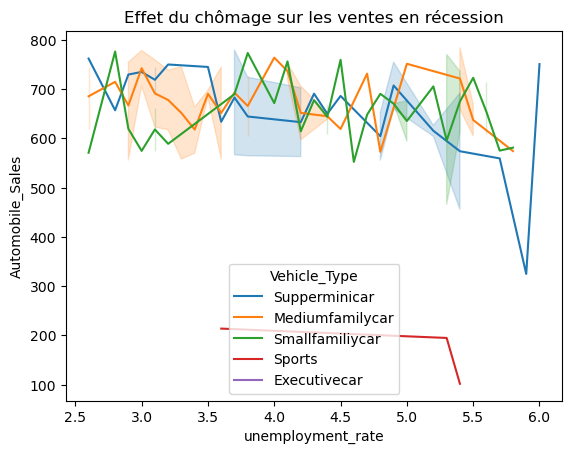

In [11]:
# TÂCHE 1.9 : Effet du taux de chômage sur les ventes
sns.lineplot(data=df[df['Recession'] == 1], x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type')
plt.title("Effet du chômage sur les ventes en récession")
plt.show()

In [16]:
# TÂCHE 2.1 - 2.6 : Création de l'application Dash
import dash
import plotly.express as px
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Tableau de Bord des Ventes Automobile"),
    dcc.Dropdown(id='dropdown', options=[{'label': v, 'value': v} for v in df['Vehicle_Type'].unique()], placeholder='Choisir un type de véhicule'),
    html.Div(id='output-div'),
    dcc.Graph(id='sales-graph')
])

@app.callback(
    Output('sales-graph', 'figure'),
    Input('dropdown', 'value')
)
def update_graph(selected_vehicle):
    filtered_data = df[df['Vehicle_Type'] == selected_vehicle] if selected_vehicle else df
    fig = px.line(filtered_data, x='Year', y='Automobile_Sales', 
              title=f"Ventes de {selected_vehicle if selected_vehicle else 'tous véhicules'}")

if __name__ == '__main__':
    app.run_server(debug=True)

KeyError: 'Vehicle_Type'

In [1]:
import pandas as pd
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update
import datetime as dt
#Create app
app = dash.Dash(__name__)
#Clear the layout and do not display exception till callback gets executed
app.config.suppress_callback_exceptions = True
# Read the wildfire data into pandas dataframe
df =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv')
#Extract year and month from the date column
df['Month'] = pd.to_datetime(df['Date']).dt.month_name() #used for the names of the months
df['Year'] = pd.to_datetime(df['Date']).dt.year
#Layout Section of Dash
#Task 1 Add the Title to the Dashboard
app.layout = html.Div(children=[
    html.H1("Tableau de bord des statistiques de vente d'automobiles", 
            style={'textAlign': 'center', 'color': 'red', 'font-size': 26}),
# TASK 2: Add the radio items and a dropdown right below the first inner division
     #outer division starts
     html.Div([
                   # First inner divsion for  adding dropdown helper text for Selected Drive wheels
                    html.Div([
                            html.H2('Select Region:', style={'margin-right': '2em'}),
                    #Radio items to select the region
                    #dcc.RadioItems(['NSW','QL','SA','TA','VI','WA'], 'NSW', id='region',inline=True)]),
                    dcc.RadioItems([{"label":"New South Wales","value": "NSW"},
                                    {"label":"Northern Territory","value": "NT"},
                                    {"label":"Queensland","value": "QL"},
                                    {"label":"South Australia","value": "SA"},
                                    {"label":"Tasmania","value": "TA"},
                                    {"label":"Victoria","value": "VI"},
                                    {"label":"Western Australia","value": "WA"}],"NSW", id='region',inline=True)]),
                    #Dropdown to select year
                    html.Div([
                            html.H2('Select Year:', style={'margin-right': '2em'}),
                        dcc.Dropdown(df.Year.unique(), value = 2005,id='year')
                    ]),
#TASK 3: Add two empty divisions for output inside the next inner division. 
         #Second Inner division for adding 2 inner divisions for 2 output graphs
                    html.Div([
                
                        html.Div([ ], id='plot1'),
                        html.Div([ ], id='plot2')
                    ], style={'display': 'flex'}),
    ])
    #outer division ends
])
#layout ends
#TASK 4: Add the Ouput and input components inside the app.callback decorator.
#Place to add @app.callback Decorator
@app.callback([Output(component_id='plot1', component_property='children'),
               Output(component_id='plot2', component_property='children')],
               [Input(component_id='region', component_property='value'),
                Input(component_id='year', component_property='value')])
#TASK 5: Add the callback function.   
#Place to define the callback function .
def reg_year_display(input_region,input_year):  
    #data
   region_data = df[df['Region'] == input_region]
   y_r_data = region_data[region_data['Year']==input_year]
    #Plot one - Monthly Average Estimated Fire Area   
   est_data = y_r_data.groupby('Month')['Estimated_fire_area'].mean().reset_index()
   fig1 = px.pie(est_data, values='Estimated_fire_area', names='Month', title="{} : Monthly Average Estimated Fire Area in year {}".format(input_region,input_year))   
     #Plot two - Monthly Average Count of Pixels for Presumed Vegetation Fires
   veg_data = y_r_data.groupby('Month')['Count'].mean().reset_index()
   fig2 = px.bar(veg_data, x='Month', y='Count', title='{} : Average Count of Pixels for Presumed Vegetation Fires in year {}'.format(input_region,input_year))    
   return [dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2) ]
if __name__ == '__main__':
    app.run_server()